In [1]:
import pandas as pd

# Load the dataset to inspect the data types and null values
file_path = "C:/Users/User/Downloads/cocaine_group.csv"
data = pd.read_csv(file_path)

# Display data types and null value counts
data_info = data.info()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               156 non-null    int64  
 1   sex               156 non-null    object 
 2   racegrp           156 non-null    object 
 3   homeless          156 non-null    object 
 4   substance         156 non-null    object 
 5   mcs               156 non-null    float64
 6   pcs               156 non-null    float64
 7   cesd              156 non-null    int64  
 8   pss_fr            156 non-null    int64  
 9   g1b               156 non-null    object 
 10  avg_drinks        156 non-null    int64  
 11  hospitalizations  156 non-null    int64  
 12  rabscores         156 non-null    float64
 13  satreat           156 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 17.2+ KB


In [3]:
descriptive_stats = data.describe(include='all')
descriptive_stats

,age,sex,racegrp,homeless,substance,mcs,pcs,cesd,pss_fr,g1b,avg_drinks,hospitalizations,rabscores,satreat
count,156.000000,156,156,156,156,156.000000,156.000000,156.000000,156.000000,156,156.000000,156.000000,156.000000,156
unique,NaN,2,4,2,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,male,black,housed,cocaine,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,no
freq,NaN,115,129,96,156,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,114
mean,34.583333,NaN,NaN,NaN,NaN,33.914685,51.225864,29.570513,6.826923,NaN,12.602564,2.525641,0.145994,NaN
std,6.785143,NaN,NaN,NaN,NaN,13.346341,10.261781,13.299581,4.136640,NaN,15.795744,4.291700,0.069763,NaN
min,23.000000,NaN,NaN,NaN,NaN,7.938221,23.482084,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,30.000000,NaN,NaN,NaN,NaN,24.134239,44.627618,19.000000,3.000000,NaN,2.000000,1.000000,0.100000,NaN
50%,34.000000,NaN,NaN,NaN,NaN,31.818723,53.386608,30.000000,6.000000,NaN,6.000000,1.000000,0.150000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,43.551059,58.326977,39.000000,10.250000,NaN,13.250000,3.000000,0.175000,NaN


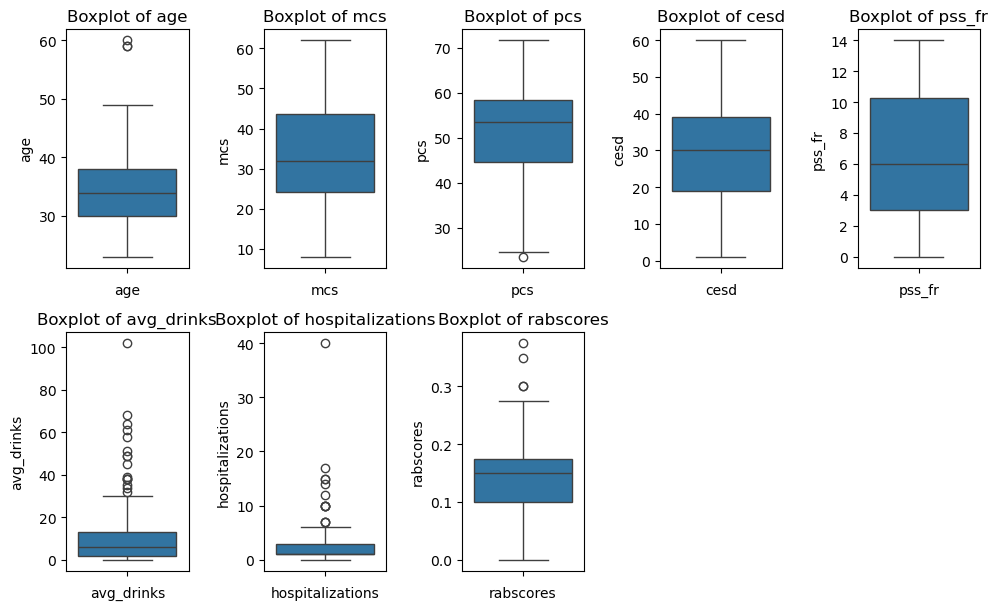

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on numerical columns
numerical_columns = ['age', 'mcs', 'pcs', 'cesd', 'pss_fr', 'avg_drinks', 'hospitalizations', 'rabscores']

# Create boxplots to check for outliers in numerical variables
plt.figure(figsize=(10, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


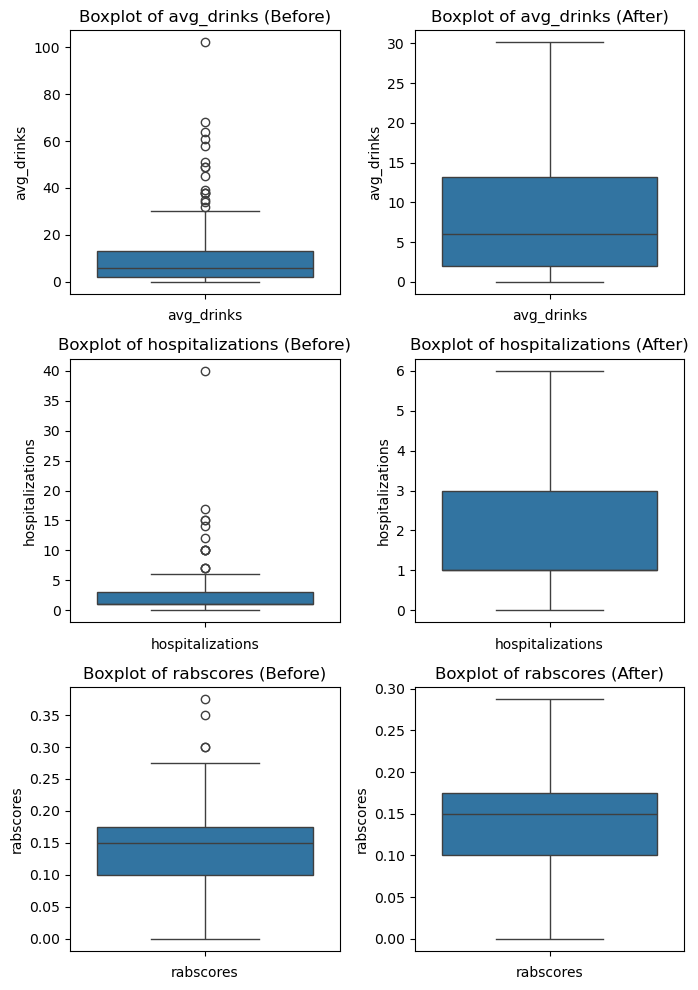

In [7]:
# Define a function to calculate outlier thresholds using the IQR method
def calculate_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to handle outliers by capping them at thresholds (Winsorization)
def cap_outliers(series):
    lower_bound, upper_bound = calculate_outlier_bounds(series)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Identify columns for outlier handling
columns_to_handle = ['avg_drinks', 'hospitalizations', 'rabscores']

# Apply the outlier capping function to each column
data_cleaned = data.copy()
for column in columns_to_handle:
    data_cleaned[column] = cap_outliers(data_cleaned[column])

# Display the summary statistics before and after outlier handling
summary_before = data[columns_to_handle].describe()
summary_after = data_cleaned[columns_to_handle].describe()


# Plot boxplots before and after outlier handling for visual comparison
plt.figure(figsize=(7, 10))
for i, column in enumerate(columns_to_handle, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column} (Before)')
    plt.xlabel(column)
    
    plt.subplot(3, 2, 2*i)
    sns.boxplot(data_cleaned[column])
    plt.title(f'Boxplot of {column} (After)')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [9]:
# Function to identify outliers before Winsorization
def identify_outliers(series):
    lower_bound, upper_bound = calculate_outlier_bounds(series)
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Identify outliers for each numerical variable before Winsorization
outliers_summary = {}
for column in numerical_columns:
    outliers = identify_outliers(data[column])
    outliers_summary[column] = {
        'Number of Outliers': len(outliers),
        'Outlier Values': outliers.tolist(),
        'Maximum values' : outliers.max()
    }

# Display the summary of outliers before Winsorization
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')
outliers_summary_df

,Number of Outliers,Outlier Values,Maximum values
age,3,"[60, 59, 59]",60.000000
mcs,0,[],NaN
pcs,1,[23.482084274292],23.482084
cesd,0,[],NaN
pss_fr,0,[],NaN
avg_drinks,16,"[32, 102, 61, 39, 38, 64, 35, 38, 34, 51, 45, ...",102.000000
hospitalizations,13,"[12, 14, 10, 15, 10, 10, 10, 40, 7, 7, 15, 17, 7]",40.000000
rabscores,4,"[0.375, 0.35, 0.3, 0.3]",0.375000


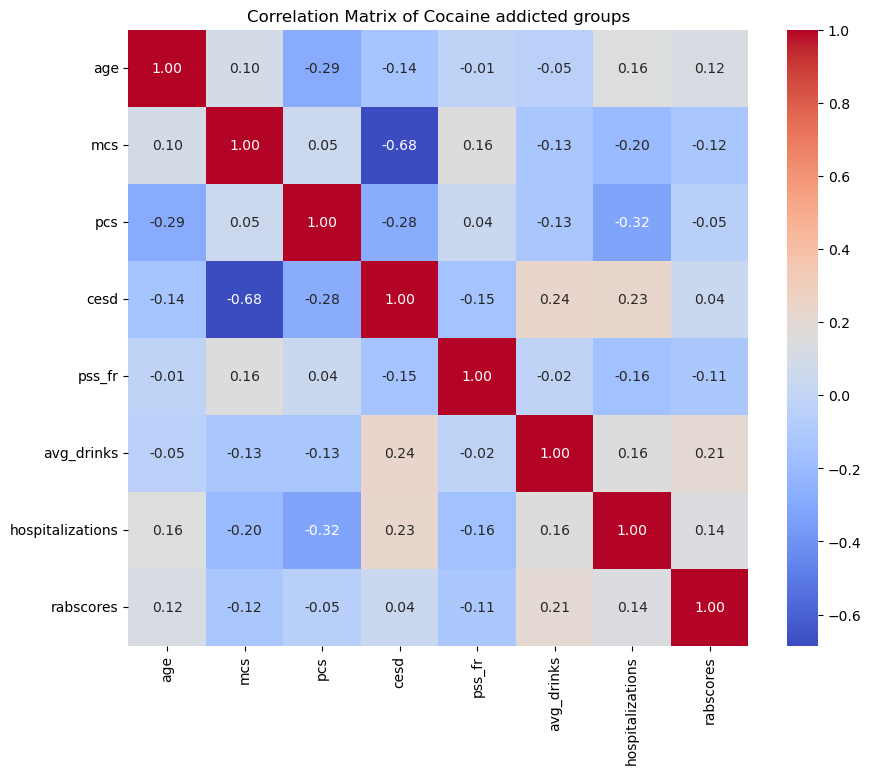

In [13]:
# Calculate correlation matrix after Winsorization
correlation_after = data_cleaned[numerical_columns].corr()

# Plot heatmap for the correlation matrix after Winsorization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_after, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Cocaine addicted groups")
plt.show()


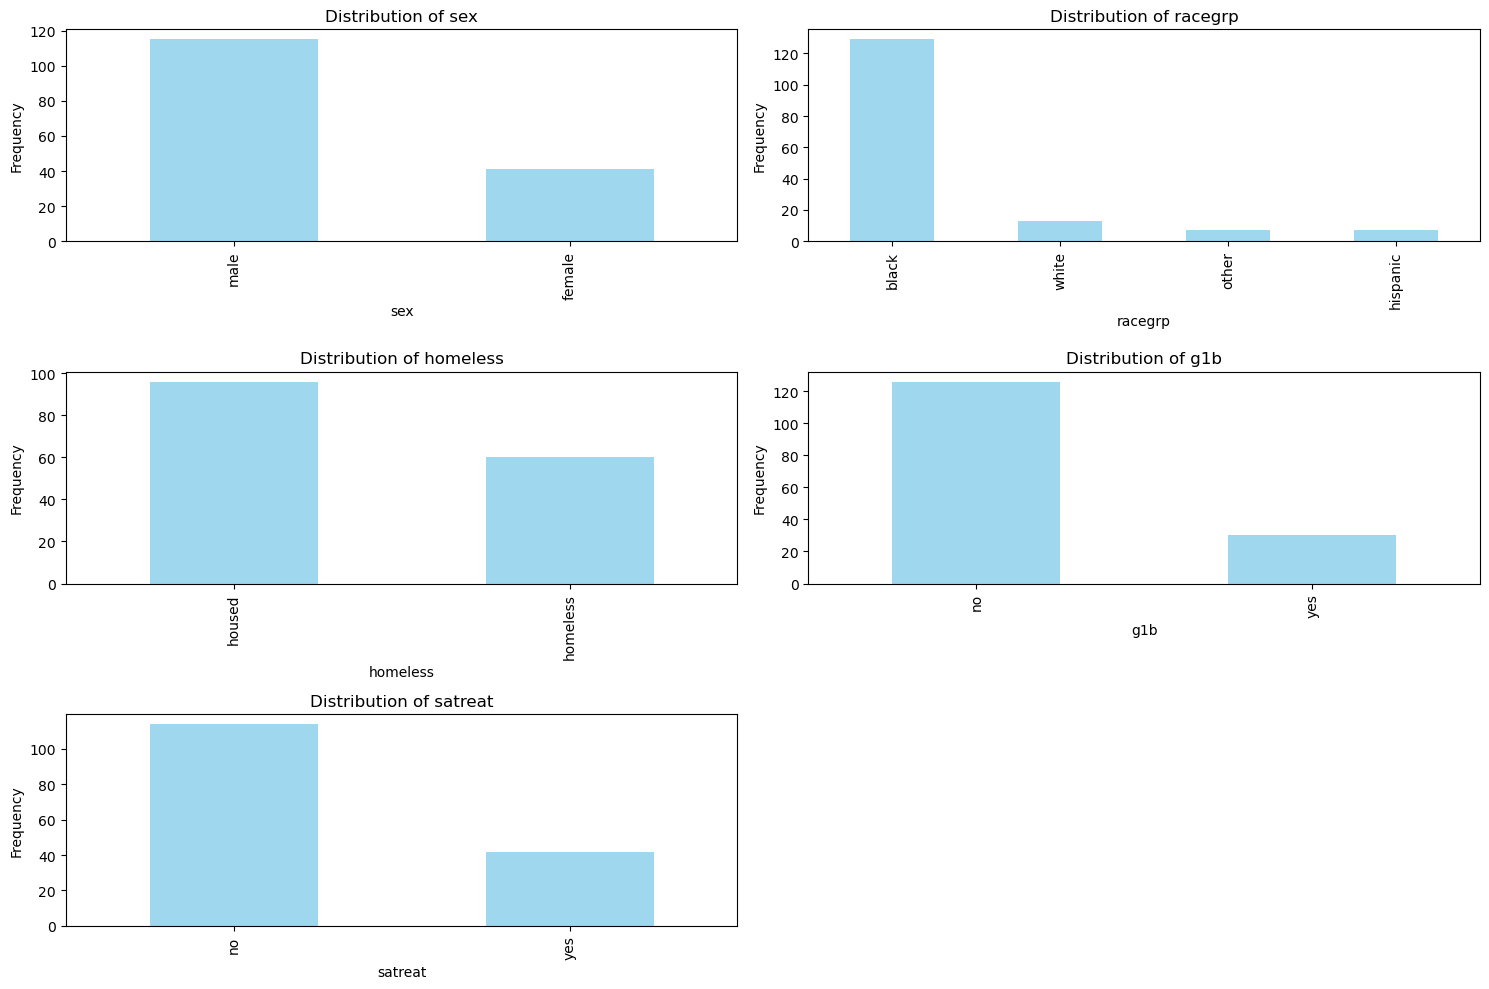

In [15]:
categorical_columns = ['sex', 'racegrp', 'homeless', 'g1b', 'satreat']

# Plot bar charts for the categorical variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    data[column].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()